Compx310 Lab8
Levi Reid
ID = 1540999

In [1]:
ID = 1540999

Import required libraries

In [2]:
from datetime import datetime 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

use pandas to get the data from the marketing csv

In [3]:
df=pd.read_csv('/kaggle/input/marketing-campaign/marketing_campaign.csv',sep='\t') 

The following code creates features that would be helpful to describe the profile of the customer

creates a new field to store the age of the customer, 

recodes the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)

recodes the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 

creates a new field to store the number of children in the household

creates a new field to store the household size

In [4]:
df['Age']=2022-df['Year_Birth'] 
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True)
df['Children']=df['Kidhome']+df['Teenhome']
df['Family_Size']=df['Marital_Status']+df['Children']+1

The following code creates features that would be helpful to describe the customer's purchasing preference and behaivior

creates a new field to store the total spending of the customer

creates subsequent fields to store the spending proportion for each product by the customer


In [5]:
df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df['Prop_Wines']=df["MntWines"]/df["Total_Spending"]
df['Prop_Fruits']=df["MntFruits"]/df["Total_Spending"]
df['Prop_MeatProducts']=df["MntMeatProducts"]/df["Total_Spending"]
df['Prop_FishProducts']=df["MntFishProducts"]/df["Total_Spending"]
df['Prop_SweetProducts']=df["MntSweetProducts"]/df["Total_Spending"]
df['Prop_GoldProds']=df["MntGoldProds"]/df["Total_Spending"]

The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to


In [6]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format='mixed')
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

The following code remove outliers in the dataset that are plausibly caused by data-entry errors (improbable values) 

Generally, we would remove outliers when we do customer segmentation, as we are more interested in the general population rather than the outliers

In [7]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<110000)]
df = df[(df["NumWebVisitsMonth"]<11)]
df = df[(df["NumWebPurchases"]<20)]
df = df[(df["NumCatalogPurchases"]<20)] 

Finally we are going to drop some of the fields that are no longer relevant / unhelpful for the clustering

Note: depending on the question we would like to have answered, there is a case we can make to keep 

'MntFruits','MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts' and 'MntGoldProds', however 

because we are interested in the purchasing preferance rather than amount spent, the field for the spending 

proportion we created above would be more helpful

We dropped the responses to the individual promotions because very few customers react to those promotions 

(not enough to form their own clusters), so instead we look at the overall response, using the field created above

Less than 1% of customers filed a complaint. We drop the field as it wouldn't create a meaningful cluster

In [8]:
fields_to_drop=['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue','AcceptedCmp1',
    'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain',
    'MntFruits','MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df.drop(fields_to_drop,axis=1,inplace=True)
df.dropna(inplace=True)

Helper function for to do 3d scatter plots,

In [9]:
def scatter_3d(x,y,z,c=None):
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111, projection='3d', label="bla")
    ax.scatter(x, y, z, s=40, c=c, marker='o',cmap=plt.cm.viridis)
    ax.set_title("The Plot Of The Clusters")
    plt.show()

**Task 2 Begins**

applying StandardScaler preprocessing on the dataframe df, and assigned the fit_transformed values as df_scaled

In [10]:
scaler = StandardScaler() # Initialise a scaler
df_scaled = scaler.fit_transform(df)  # Use the fit_transform scaler attribute to fit the scaler and transform the data
print("fit scaler and scaled the data")

fit scaler and scaled the data


applying PCA transformation on df_scaled using all 23 components

In [11]:
pca = PCA(n_components = 23)
pca.fit(df_scaled)
print("Applied PCA transformation")

Applied PCA transformation


Ploting the cummulative variance explained by the principal components.

In [12]:
print("Explained varriance ratios \n", pca.explained_variance_ratio_, "\n\n")

# Calculate the cumulative varriance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Calculate the number of components needed to explain 80% of the varriance
num_components_80_variance = np.argmax(cumulative_variance >= 0.8) + 1

print(num_components_80_variance)

Explained varriance ratios 
 [2.50065468e-01 1.76920167e-01 7.63537096e-02 6.33435438e-02
 5.64187315e-02 4.85065757e-02 4.34316980e-02 4.00257439e-02
 3.60913800e-02 3.12675723e-02 2.76745145e-02 2.62859780e-02
 2.59591471e-02 2.45833369e-02 1.96300045e-02 1.75886244e-02
 1.45984290e-02 1.00825243e-02 6.94416181e-03 4.22868931e-03
 1.96860080e-32 6.57996103e-33 1.12885047e-33] 


10


Test that 10 components explain 80% of the varriance

In [13]:
pca_10_test = PCA(n_components = 10)
pca_10_test.fit(df_scaled)

# Calculate the cumulative varriance
cumulative_variance = np.cumsum(pca_10_test.explained_variance_ratio_)
print("The cumulative varriance with 10 components is: ", cumulative_variance)

The cumulative varriance with 10 components is:  [0.25006547 0.42698564 0.50333934 0.56668289 0.62310162 0.6716082
 0.71503989 0.75506564 0.79115702 0.82242459]


Note that by the final eliment (reprisenting the 10 component) we have reached 80% varriance captured since 0.8224 is greater than 0.8

Redo the PCA transformation on df_scaled using 10 componenents and assign the result of the transformation to df_transformed.

In [14]:
pca_10 = PCA(n_components = 10)
df_transformed = pca_10.fit_transform(df_scaled)
print("Completed fitting and transforming for 10 components")

Completed fitting and transforming for 10 components


visualizeing the first 3 components of df_transformed using a 3d scatter plot

/tmp/ipykernel_32/1137142251.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, s=40, c=c, marker='o',cmap=plt.cm.viridis)


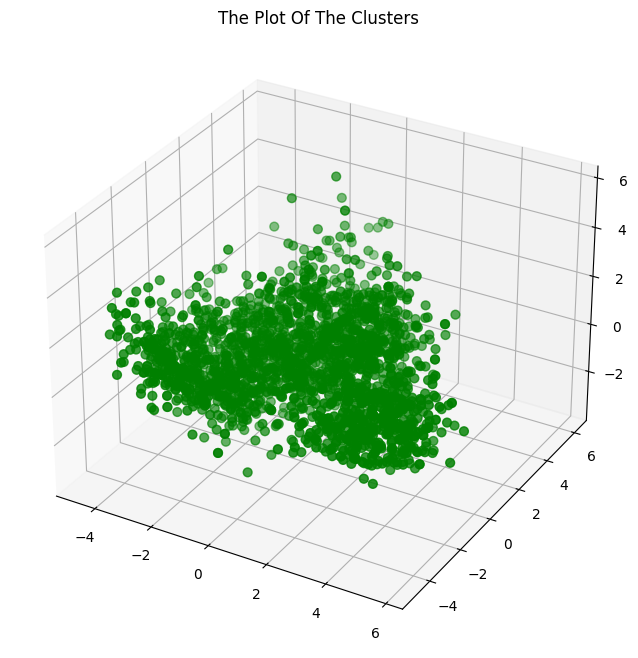

In [15]:
x = df_transformed[:, 0]  # First principal component
y = df_transformed[:, 1]  # Second principal component
z = df_transformed[:, 2]  # Third principal component
scatter_3d(x,y,z,c='green')

**Task 3 Begins**

Applying KMeans clustering to df_transformed and measuring the inertia score for n_clusters between 2 and 10

In [16]:
inertia_scores = [] # Initialise an empty list to store the enertia values in

n_clusters_range = range(2, 11)  # Define the range of clusters to search

# Loop through the range of clusters and fit KMeans for each value
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters,  n_init=10, random_state=ID)
    kmeans.fit(df_transformed)
    # Append the inertia score to the list
    inertia_scores.append(kmeans.inertia_)

print("Inertia Scores:", inertia_scores)

Inertia Scores: [31744.71187821842, 26557.67598330655, 23764.830731354774, 22396.16718830669, 21292.239621659734, 20388.310328358308, 19470.491694598928, 18749.448074604123, 18166.408076991047]


Plot the inertia scores for easier inspection of the data

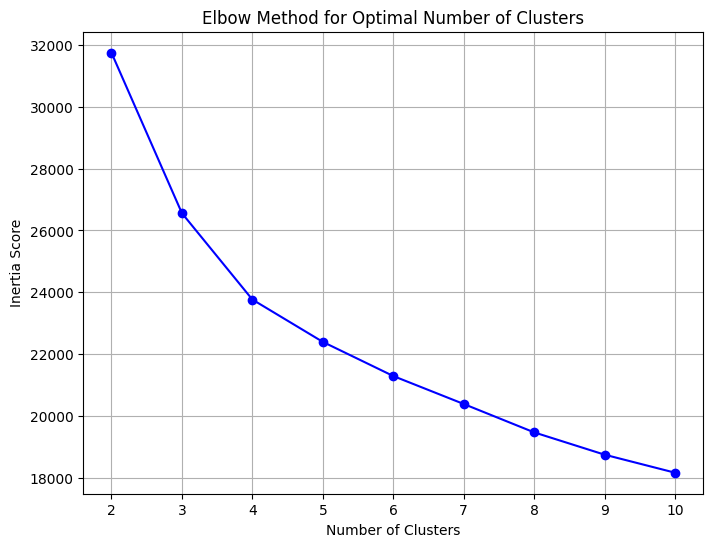

In [17]:
# Plotting the inertia scores
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

Based on the plot above it is dificult to say with certainty what the optimal number of cluster is. However, the best guess appears to be 4 clusters as this node has the most significant change in slope. 

Find the cluster lables for 4 clusters

In [19]:
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=ID)
kmeans4.fit(df_transformed)

# Get cluster labels for each data point
cluster_labels = kmeans4.predict(df_transformed)

# Print cluster labels
print(cluster_labels)

[1 0 1 ... 1 2 0]


Having found the clsuter lables, they will now be assigned to the clusters

In [22]:
df['Clusters'] = cluster_labels

# Now df contains a new column called 'Clusters' with the cluster labels
print(df.head())  # Print the DataFrame to verify the changes

   Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          2               0  58138.0        0         0       58   
1          2               0  46344.0        1         1       38   
2          2               1  71613.0        0         0       26   
3          2               1  26646.0        1         0       26   
4          4               1  58293.0        1         0       94   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   ...  Total_Spending  Prop_Wines  Prop_Fruits  Prop_MeatProducts  \
0  ...            1617    0.

the newly modifed data frame will now be transformed.

In [23]:
scaler = StandardScaler() # Initialise a scaler
df_clusters_scaled = scaler.fit_transform(df)  # Use the fit_transform scaler attribute to fit the scaler and transform the data
pca_10 = PCA(n_components = 10)
df_clusters_transformed = pca_10.fit_transform(df_scaled)

The resulting transformed data set can now be visualized in a 3d plot with each cluster colored based on its lable

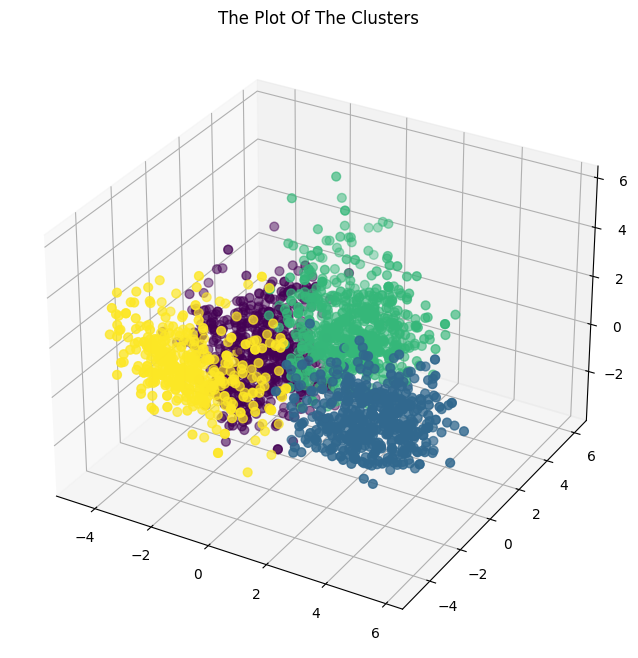

In [27]:
x = df_clusters_transformed[:, 0]  # First principal component
y = df_clusters_transformed[:, 1]  # Second principal component
z = df_clusters_transformed[:, 2]  # Third principal component
scatter_3d(x,y,z,c=cluster_labels)

**Task 4 Begins**

Making a scater plot between income and total spending with points coloured by class

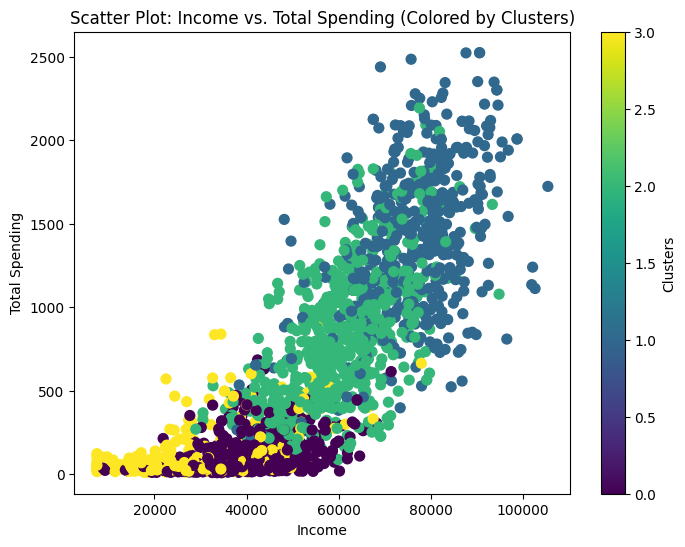

In [30]:
# Create a scatter plot with 'Income' on the x-axis, 'Total_spending' on the y-axis, and color by 'Clusters'
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Total_Spending'], c=df['Clusters'], cmap='viridis', marker='o', s=50)

# Set labels for the axes
plt.xlabel('Income')
plt.ylabel('Total Spending')

# Add a colorbar to show the mapping of cluster labels to colors
plt.colorbar(label='Clusters')

# Show the plot
plt.title('Scatter Plot: Income vs. Total Spending (Colored by Clusters)')
plt.show()

Doing a boxplot by clusters, for each of the following fields describing the attributes of the customer
['Age'.'Education','Marital_Status','Income', 'Children', 'Family_Size','Kidhome','Teenhome']

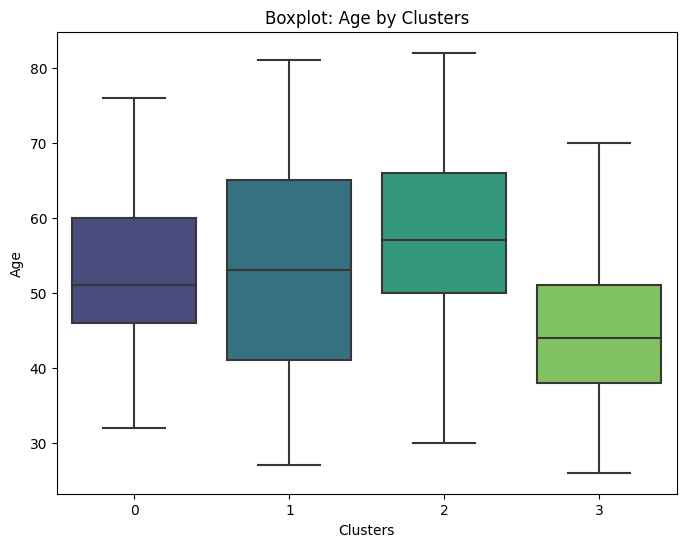

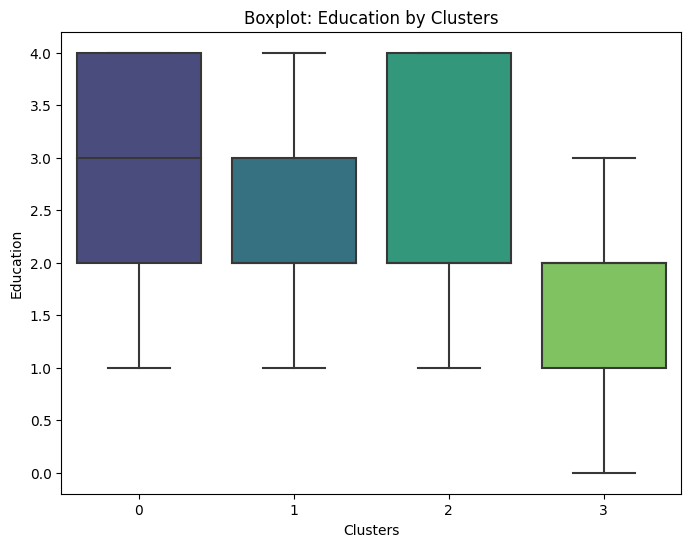

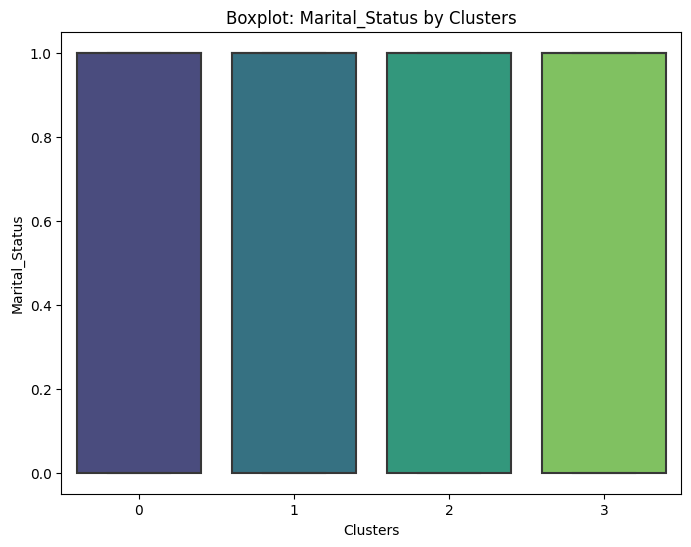

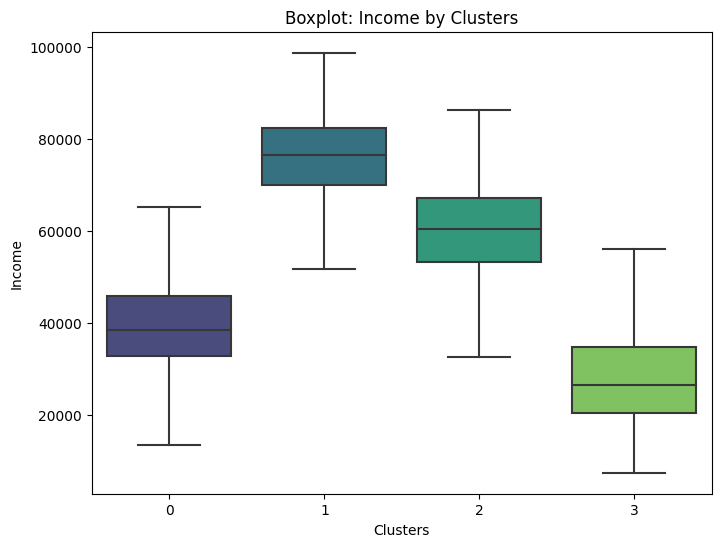

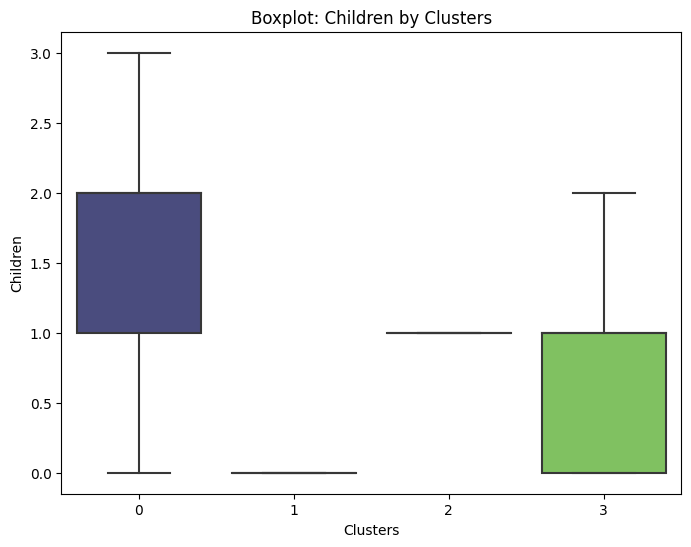

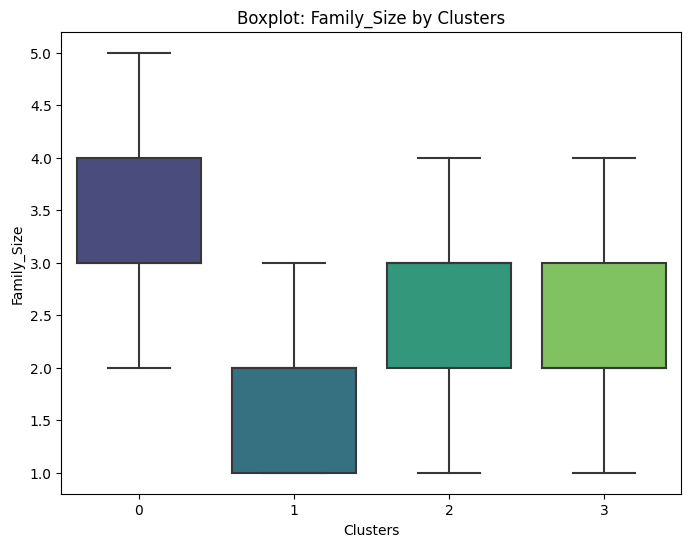

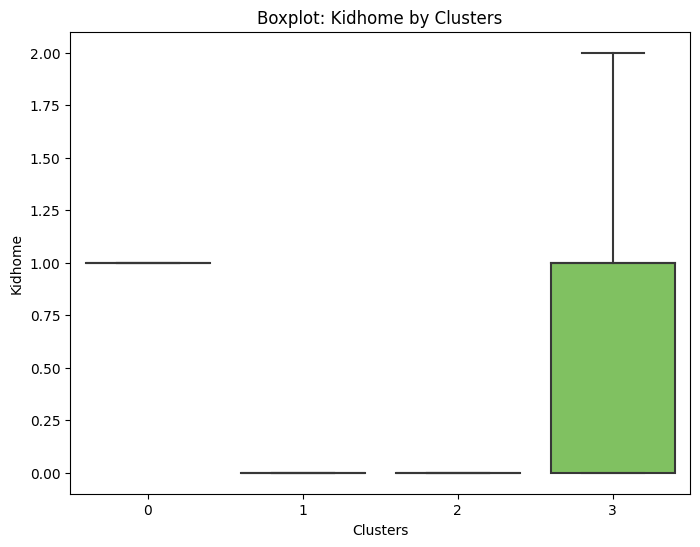

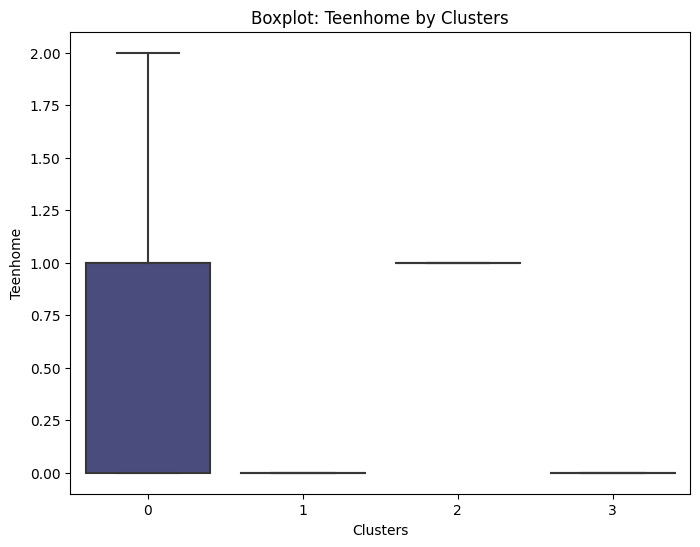

In [35]:
fields_to_plot = ['Age', 'Education', 'Marital_Status', 'Income', 'Children', 'Family_Size', 'Kidhome', 'Teenhome']

# Loop through each field and create a boxplot for each, grouped by 'Clusters'
for field in fields_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Clusters', y=field, data=df, palette='viridis', showfliers=False)
    plt.xlabel('Clusters')
    plt.ylabel(field)
    plt.title(f'Boxplot: {field} by Clusters')
    plt.show()

Doing another box plot for fields:
['Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Days_as_Customer', 'Offers_Responded_To']

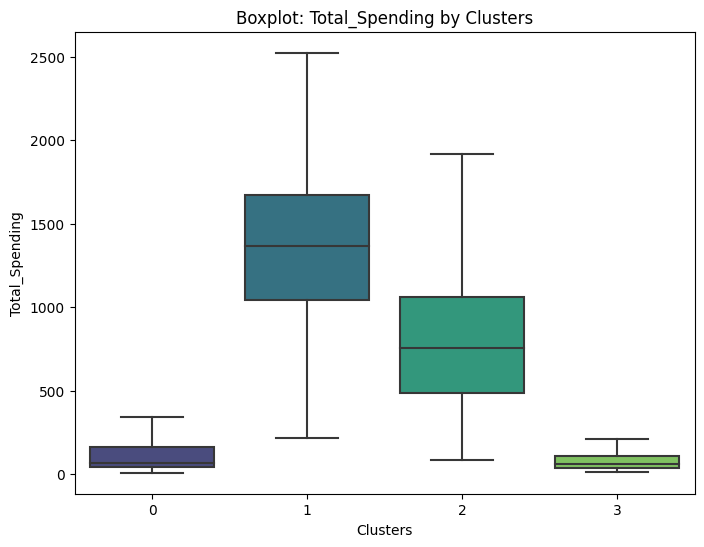

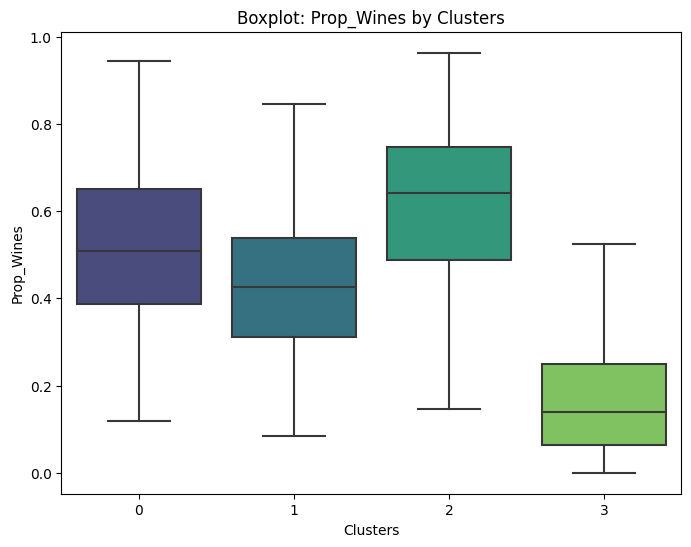

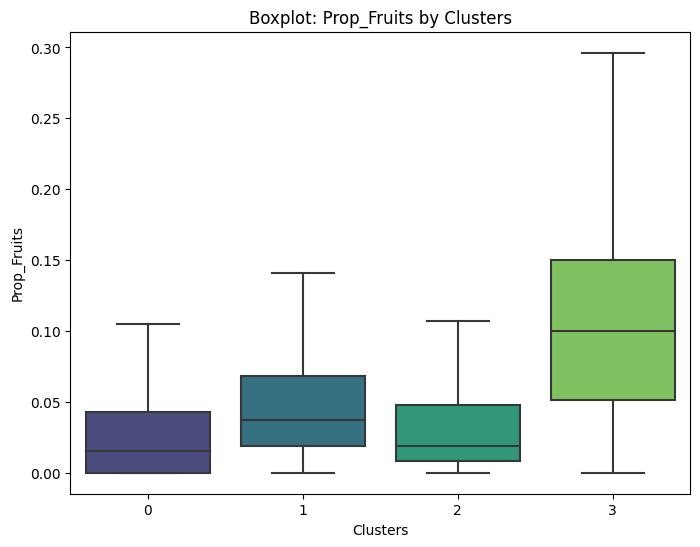

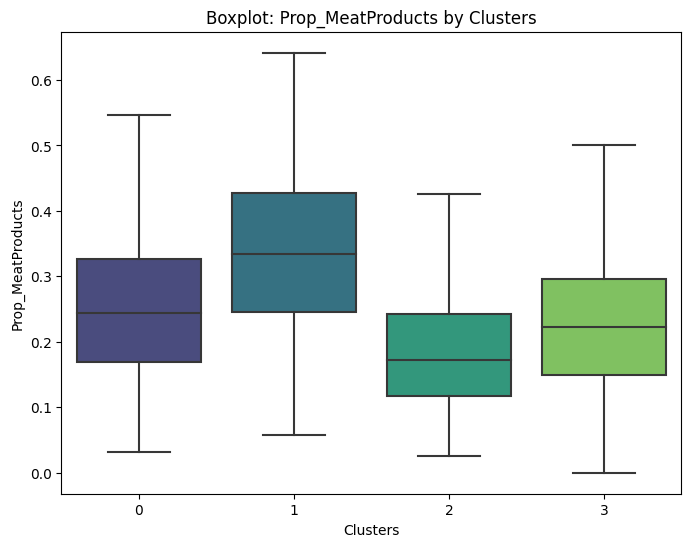

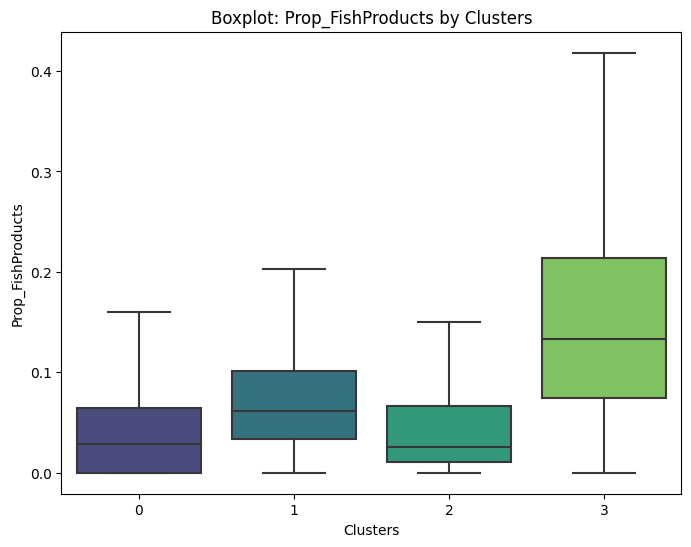

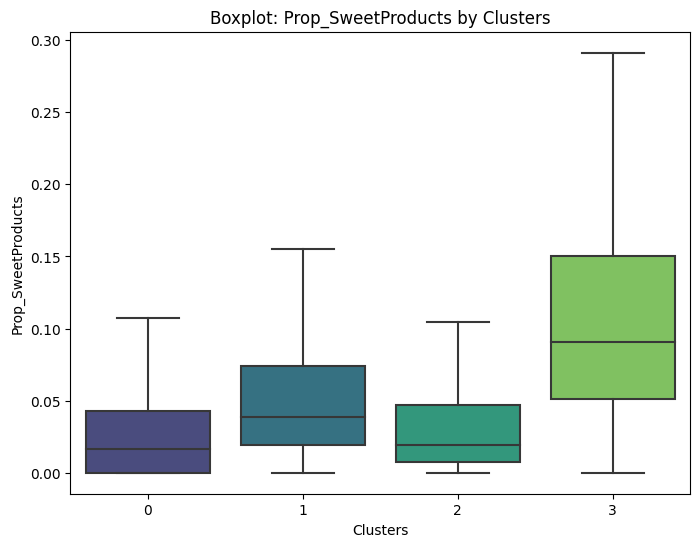

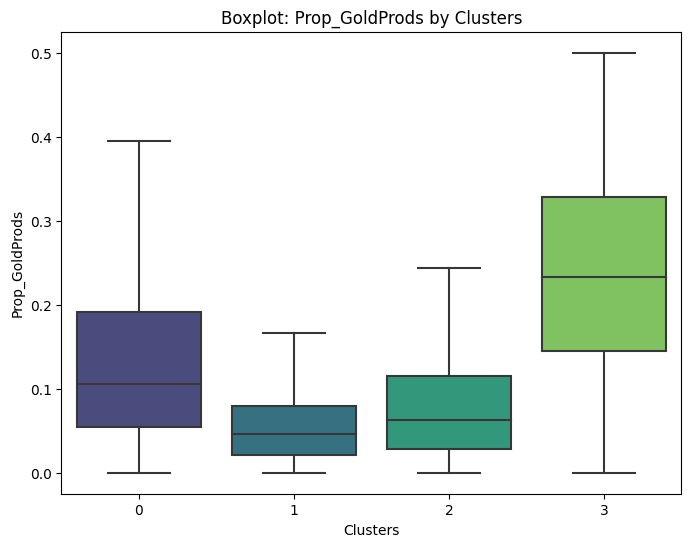

In [34]:
fields_to_plot = ['Total_Spending','Prop_Wines','Prop_Fruits','Prop_MeatProducts','Prop_FishProducts','Prop_SweetProducts','Prop_GoldProds']

# Loop through each field and create a boxplot for each, grouped by 'Clusters'
for field in fields_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Clusters', y=field, data=df, palette='viridis', showfliers=False)
    plt.xlabel('Clusters')
    plt.ylabel(field)
    plt.title(f'Boxplot: {field} by Clusters')
    plt.show()

Getting the cluster means using Pandas one liner

In [33]:
df.groupby('Clusters').mean().T

Clusters,0,1,2,3
Education,2.733547,2.505859,2.665109,1.653012
Marital_Status,0.678973,0.587891,0.674455,0.624096
Income,39098.995185,75882.820312,60193.596573,28427.727711
Kidhome,0.927769,0.023438,0.163551,0.665060
Teenhome,0.683788,0.044922,0.967290,0.096386
Recency,49.401284,49.445312,48.498442,48.922892
NumDealsPurchases,2.454254,1.046875,3.484424,1.804819
NumWebPurchases,2.382022,4.896484,6.345794,2.166265
NumCatalogPurchases,0.606742,5.912109,3.344237,0.604819
NumStorePurchases,3.394864,8.279297,7.968847,3.296386


**Discussion**

The 3d scatter plot of clusters shows that sepperating clusters in just 3 dimensions would be difficult as there appears to be significant overlap between clusters when considering just the first 3 components. This shows the clear benifits of being able to do dimenionality reduction as the data becomes much more manigable when considering the 4 clusters and comparing them between one another.

The 2 dimesnional scatter plot of income vs spending shows what looks like an expeonential relationship between income and spending. However, it is not possible for this relationship to actually be exponensial since one customer cannot sustainibly spend more than they earn. What this plot highlights though is that customers with higher income will spend dispopotionately more than those with lower income. This is likely because customers with a higher income can make more discressional purchases without impacting their basic needs. This concept can be tested by comparing the purchasing mean daat for class 1 (generally high income and spending) and class 3 (generally low income and spending). 

The first clear differance is that the mean number of store purchases, catalog purchases, and web purchases is significantly higher for cluster 1 than cluster 3. This demonstrtes that cluster 1 tend to just buy more things per customer. Additionally, cluster 1 customers buy more meat, fruits, and fish than cluster 3 customers. These are all high value products. Unfortunately low value products like canned food, bread pasta or low cost grains and vegatables like rice carrots and potatos are not included on this list so the convers low value product proportion cannot be easily compared between cluster 1 and cluster 3 customers.

Other factors which may impact spending are the number of people in a houshold. On average, cluster 1 customers have the smallest family size with a mean of just 1.65 people per houshold. This is surprising as one would expect smaller housholds would tend to spend less, but in fact the cluster with the smallest average houshold has the greatest average spend. Cluster 0 has the largest average family size with 3.3 people in a family on average. However cluster 0  customers are still the second lowest spenders on average.

Overall, it appears that income is strongly corrilated to spending. Higher income customers spends substantiolly more than lower income customers as seen particularly in the scatter plot. Other key observations are that cluster 0 and cluster 3 are the most likely to have kids at home and generally have the lowest spending. 

cluster 3 have the lowest average education level as well as the lowest income. These two seem corrilated as lower education levels generally translate to lower income. However, the greatest average education level was found in cluster 0 though this cluster still had a relitively low average income. and quite a low average spend. This may well be related to the fact that cluster 0 is the most likely group of customers to have kids at home. Perhaps one parent spends less time at work, despite being well qualified, in order to care for children. 

Verry little can be said based on the length of time a person has been a customer. Each cluster had roughly the same average time as a customer. Responding to offers seems to corrilate highly with spending. cluster 1 responded to significantly more offers on average than any other cluster, and clsuter 2 responded to the next most. This corrilates well with the greatest and next greatest average spend.

One final interesting observation is that clsuter 3 have the largest average sweet product propotion, spending aproximately 10% of their total purchase on sweets. This proportion is about twice that of the next highest proportion which is by cluster 1 customers (spending a little under 6% on sweets). This is perculier since sweet products are typically very discressional. Cluster 3 customers do frequently have kids at home, however cluster 0 are even more likely to have a kids at home on average, and actually have the lowest proportional spend on sweets at just 2.7%. Thus, kids at home does not seem to explain the proportion of sweets a customer buys, neither does income despite sweets being discressionarry. One strongly corrilated explainer is actually education level. Class 0 with the highest average education level have the lowest proportionate sweets spend and class 3 with the lowest average education level have the greates average proportionate sweets spend. This inverse relation actually fits all clusters in the data. 